<h1><center><u> Stock Market Sentiment Analysis </u></center></h1>

<h3 style="color:blue;"> (1) Import Python Libraries </h3>

In [45]:
import numpy as np
import pandas as pd

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
%matplotlib inline

<h3 style="color:blue;"> (2) Loading the Data Set </h3>

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='

In [76]:
tickers = ['AMZN', 'META', 'AAPL']

In [77]:
news_tables = {}

for ticker in tickers:
    
    url = finviz_url + ticker
    
    req = Request(url=url, headers={'user-agent':'my-app'})
    response = urlopen(req)
    html = BeautifulSoup(response, 'html')
    
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

<h3 style="color:blue;"> (3) Parsing and Manipulating Data </h3>

In [78]:
parsed_data = []

for ticker, news_table in news_tables.items():
    
    for row in news_table.findAll('tr'):
        
        title = row.a.text
        timestamp = row.td.text.strip()
        date_data = timestamp.split(' ')
        
        if len(date_data) == 1:
            time = date_data[0]
            date = ""
        else:
            date = date_data[0]
            time = date_data[1]
            
        parsed_data.append([ticker, date, time, title])

<h3 style="color:blue;"> (4) Applying Sentiment Analysis </h3>

In [79]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df

,ticker,date,time,title
0,AMZN,Aug-23-23,12:39PM,Generative AI Battle Forms. Should Big Tech Co...
1,AMZN,,10:30AM,3 Top Growth Stocks to Buy Before the Next Bul...
2,AMZN,,10:15AM,2 Top Stocks Billionaires Can't Stop Buying in...
3,AMZN,,09:58AM,Billionaire Ken Fisher and Corporate Insiders ...
4,AMZN,,09:42AM,Qatar Wealth Fund Invests $1 Billion in Ambani...
...,...,...,...,...
295,AAPL,,10:56AM,This Wall Street Strategist Predicted Apple's ...
296,AAPL,,10:24AM,"U.S. Steel, the First $1 Billion Company, Is N..."
297,AAPL,,10:07AM,2 Growth Stocks to Buy in August
298,AAPL,,09:53AM,Is Apple Stock a Buy?


In [53]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHBHAM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df

,ticker,date,time,title,compound
0,AMZN,Aug-23-23,12:39PM,Generative AI Battle Forms. Should Big Tech Co...,-0.3818
1,AMZN,,10:30AM,3 Top Growth Stocks to Buy Before the Next Bul...,0.5267
2,AMZN,,10:15AM,2 Top Stocks Billionaires Can't Stop Buying in...,0.3995
3,AMZN,,09:58AM,Billionaire Ken Fisher and Corporate Insiders ...,0.0000
4,AMZN,,09:42AM,Qatar Wealth Fund Invests $1 Billion in Ambani...,0.4939
...,...,...,...,...,...
295,AAPL,,10:56AM,This Wall Street Strategist Predicted Apple's ...,0.8591
296,AAPL,,10:24AM,"U.S. Steel, the First $1 Billion Company, Is N...",0.0000
297,AAPL,,10:07AM,2 Growth Stocks to Buy in August,0.3818
298,AAPL,,09:53AM,Is Apple Stock a Buy?,0.0000


<h3 style="color:blue;"> (5) Visualization of Sentiment Analysis </h3>

In [81]:
df['date'] = pd.to_datetime(df.date).dt.date

In [82]:
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis='columns').transpose()
mean_df

ticker,AAPL,AMZN,META
date,,,
2023-08-12,NaN,NaN,-0.5413
2023-08-13,NaN,NaN,0.0000
2023-08-14,NaN,NaN,0.0000
2023-08-15,0.4939,NaN,0.0000
2023-08-16,0.3182,NaN,0.0000
2023-08-17,0.0000,0.0000,NaN
2023-08-18,-0.2500,-0.2960,-0.3400
2023-08-19,0.7845,0.7845,0.0000
2023-08-20,0.5574,0.3818,0.2960


<Figure size 720x576 with 0 Axes>

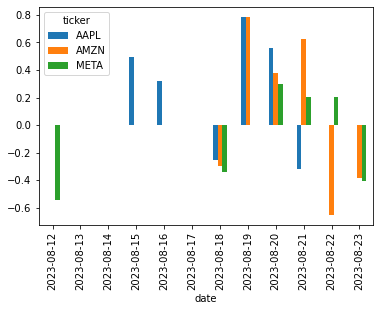

In [83]:
plt.figure(figsize=(10,8))
mean_df.plot(kind='bar')
plt.show()